In [1]:
# Install RDFLib if not already installed
!pip install rdflib pandas

# Import required libraries
from rdflib import Graph
import pandas as pd


In [58]:
# Load RDF file
g = Graph()
g.parse("EX.rdf", format="turtle")

# Print the number of triples loaded
print(f"✅ RDF Data Loaded: {len(g)} triples")

✅ RDF Data Loaded: 58620 triples


In [59]:
# Print first few triples for inspection
for stmt in g:
    print(stmt)
    break  # Print only the first triple


(rdflib.term.URIRef('http://example.org/record2207'), rdflib.term.URIRef('http://example.org/DiscoveryYear'), rdflib.term.Literal('2014'))


In [62]:
# Get unique predicates in the RDF data
predicates = set()
for stmt in g:
    predicates.add(stmt[1])

# Print the unique predicates
print(f"Unique predicates in RDF data:\n")
for predicate in predicates:
    print(predicate)


Unique predicates in RDF data:

http://example.org/StarMassSolarMasses
http://example.org/DiscoveryYear
http://example.org/StarTemperatureK
http://example.org/PlanetMassEarthMasses
http://example.org/StarMetallicityFeH
http://example.org/HostStar
http://example.org/StarRadiusSolarRadii
http://example.org/PlanetRadiusEarthRadii
http://example.org/ExoplanetName
http://example.org/DistanceParsecs


In [3]:
# Define SPARQL query to get all exoplanets and their host stars
query = """
PREFIX ex: <http://example.org/>
SELECT ?planetName ?hostStar
WHERE {
    ?record ex:ExoplanetName ?planetName ;
            ex:HostStar ?hostStar .
}
"""

# Execute Query
results = g.query(query)

# Convert to Pandas DataFrame for better visualization
data = [(str(row.planetName), str(row.hostStar)) for row in results]
df = pd.DataFrame(data, columns=["Exoplanet Name", "Host Star"])
df.head()  # Show the first few rows

,Exoplanet Name,Host Star
0,11 Com b,11 Com
1,11 UMi b,11 UMi
2,14 And b,14 And
3,14 Her b,14 Her
4,16 Cyg B b,16 Cyg B


In [76]:
# SPARQL Query: Largest and Smallest Exoplanets by Mass
query = """
PREFIX ex: <http://example.org/>

SELECT ?planetName ?mass
WHERE {
  ?planet ex:ExoplanetName ?planetName .
  ?planet ex:PlanetMassEarthMasses ?mass .
  FILTER(BOUND(?mass) && regex(str(?mass), "^[0-9.]+$"))
}
ORDER BY DESC(xsd:float(?mass))
LIMIT 1
"""
# Run the query
results = g.query(query)

# Print the results
for row in results:
    print(f"Exoplanet: {row.planetName}, Mass: {row.mass} Earth Masses")


Exoplanet: HR 2562 b, Mass: 9534.9 Earth Masses


In [78]:
# SPARQL Query: Most Distant Exoplanets
query = """
PREFIX ex: <http://example.org/>

SELECT ?planetName ?distance
WHERE {
  ?planet ex:ExoplanetName ?planetName .
  ?planet ex:DistanceParsecs ?distance .
  FILTER(BOUND(?distance) && regex(str(?distance), "^[0-9.]+$"))
}
ORDER BY DESC(xsd:float(?distance))
LIMIT 1
"""
# Run the query
results = g.query(query)

# Print the results
for row in results:
    print(f"Exoplanet: {row.planetName}, Distance: {row.distance} Parsecs")


Exoplanet: SWEEPS-11 b, Distance: 8500.0 Parsecs


In [82]:
# SPARQL Query: Exoplanets with Star Temperature Between 3000K and 7000K
query = """
PREFIX ex: <http://example.org/>

SELECT ?planetName ?starTemperature
WHERE {
  ?planet ex:ExoplanetName ?planetName .
  ?planet ex:StarTemperatureK ?starTemperature .
  FILTER(BOUND(?starTemperature) && xsd:float(?starTemperature) >= 3000 && xsd:float(?starTemperature) <= 7000)
}
Limit 10
"""
# Run the query
results = g.query(query)

# Print the results
for row in results:
    print(f"Exoplanet: {row.planetName}, Star Temperature: {row.starTemperature} K")


Exoplanet: 11 Com b, Star Temperature: 4874.0 K
Exoplanet: 11 UMi b, Star Temperature: 4213.0 K
Exoplanet: 14 And b, Star Temperature: 4888.0 K
Exoplanet: 14 Her b, Star Temperature: 5338.0 K
Exoplanet: 16 Cyg B b, Star Temperature: 5750.0 K
Exoplanet: 17 Sco b, Star Temperature: 4157.0 K
Exoplanet: 18 Del b, Star Temperature: 4980.0 K
Exoplanet: 1RXS J160929.1-210524 b, Star Temperature: 4060.0 K
Exoplanet: 24 Boo b, Star Temperature: 4816.0 K
Exoplanet: 24 Sex b, Star Temperature: 5098.0 K


In [86]:
# SPARQL Query: Exoplanets Orbiting Stars with Specific Metallicity
query = """
PREFIX ex: <http://example.org/>

SELECT ?planetName ?starMetallicity
WHERE {
  ?planet ex:ExoplanetName ?planetName .
  ?planet ex:StarMetallicityFeH ?starMetallicity .
  FILTER(BOUND(?starMetallicity) && xsd:float(?starMetallicity) >= -1.0 && xsd:float(?starMetallicity) <= 0.5)
}
Limit 10
"""
# Run the query
results = g.query(query)

# Print the results
for row in results:
    print(f"Exoplanet: {row.planetName}, Star Metallicity: {row.starMetallicity}")


Exoplanet: 11 Com b, Star Metallicity: -0.26
Exoplanet: 11 UMi b, Star Metallicity: -0.02
Exoplanet: 14 And b, Star Metallicity: -0.21
Exoplanet: 14 Her b, Star Metallicity: 0.405
Exoplanet: 16 Cyg B b, Star Metallicity: 0.06
Exoplanet: 17 Sco b, Star Metallicity: -0.01
Exoplanet: 18 Del b, Star Metallicity: -0.06
Exoplanet: 24 Boo b, Star Metallicity: -0.78
Exoplanet: 24 Sex b, Star Metallicity: -0.03
Exoplanet: 24 Sex c, Star Metallicity: -0.03


In [98]:
# SPARQL Query: Count Exoplanets for Each Host Star
query = """
PREFIX ex: <http://example.org/>

SELECT ?hostStar (COUNT(?planetName) AS ?planetCount)
WHERE {
  ?planet ex:HostStar ?hostStar .
  ?planet ex:ExoplanetName ?planetName .
}
GROUP BY ?hostStar
ORDER BY DESC(?planetCount)
Limit 10
"""

# Run the query
results = g.query(query)

# Print the results
for row in results:
    print(f"Host Star: {row.hostStar}, Number of Exoplanets: {row.planetCount}")


Host Star: KOI-351, Number of Exoplanets: 8
Host Star: TRAPPIST-1, Number of Exoplanets: 7
Host Star: HD 10180, Number of Exoplanets: 6
Host Star: HD 110067, Number of Exoplanets: 6
Host Star: HD 191939, Number of Exoplanets: 6
Host Star: HD 219134, Number of Exoplanets: 6
Host Star: HD 34445, Number of Exoplanets: 6
Host Star: K2-138, Number of Exoplanets: 6
Host Star: Kepler-11, Number of Exoplanets: 6
Host Star: Kepler-20, Number of Exoplanets: 6


In [107]:
# SPARQL Query: Largest and Smallest Exoplanets by Radius
query = """
PREFIX ex: <http://example.org/>

SELECT ?planetName ?radius
WHERE {
  ?planet ex:ExoplanetName ?planetName .
  ?planet ex:PlanetRadiusEarthRadii ?radius .
  FILTER(BOUND(?radius) && regex(str(?radius), "^[0-9.]+$"))
}
ORDER BY DESC(xsd:float(?radius))
LIMIT 1
"""
# Run the query
results = g.query(query)

# Print the results
for row in results:
    print(f"Exoplanet: {row.planetName}, Radius: {row.radius} Earth Radii")


Exoplanet: HD 100546 b, Radius: 77.342 Earth Radii


In [111]:
# SPARQL Query: Exoplanets with Star Temperature > 6000K
query = """
PREFIX ex: <http://example.org/>

SELECT ?planetName ?starTemperature
WHERE {
  ?planet ex:ExoplanetName ?planetName .
  ?planet ex:StarTemperatureK ?starTemperature .
  FILTER(BOUND(?starTemperature) && xsd:float(?starTemperature) > 6000)
}
Limit 10
"""
# Run the query
results = g.query(query)

# Print the results
for row in results:
    print(f"Exoplanet: {row.planetName}, Star Temperature: {row.starTemperature} K")


Exoplanet: 2MASS J19383260+4603591 b, Star Temperature: 29564.0 K
Exoplanet: 30 Ari B b, Star Temperature: 6331.0 K
Exoplanet: 51 Eri b, Star Temperature: 7295.0 K
Exoplanet: AB Aur b, Star Temperature: 9770.0 K
Exoplanet: AF Lep b, Star Temperature: 6130.0 K
Exoplanet: BD-14 3065 b, Star Temperature: 6935.0 K
Exoplanet: CoRoT-11 b, Star Temperature: 6440.0 K
Exoplanet: CoRoT-14 b, Star Temperature: 6035.0 K
Exoplanet: CoRoT-19 b, Star Temperature: 6090.0 K
Exoplanet: CoRoT-21 b, Star Temperature: 6200.0 K


In [115]:
# SPARQL Query: Exoplanets Orbiting Stars with Metallicity Above 0.2
query = """
PREFIX ex: <http://example.org/>

SELECT ?planetName ?starMetallicity
WHERE {
  ?planet ex:ExoplanetName ?planetName .
  ?planet ex:StarMetallicityFeH ?starMetallicity .
  FILTER(BOUND(?starMetallicity) && xsd:float(?starMetallicity) > 0.2)
}
Limit 10
"""
# Run the query
results = g.query(query)

# Print the results
for row in results:
    print(f"Exoplanet: {row.planetName}, Star Metallicity: {row.starMetallicity}")


Exoplanet: 14 Her b, Star Metallicity: 0.405
Exoplanet: 55 Cnc b, Star Metallicity: 0.35
Exoplanet: 55 Cnc c, Star Metallicity: 0.35
Exoplanet: 55 Cnc d, Star Metallicity: 0.35
Exoplanet: 55 Cnc e, Star Metallicity: 0.35
Exoplanet: 55 Cnc f, Star Metallicity: 0.35
Exoplanet: 7 CMa b, Star Metallicity: 0.21
Exoplanet: 7 CMa c, Star Metallicity: 0.21
Exoplanet: AU Mic b, Star Metallicity: 0.23
Exoplanet: AU Mic c, Star Metallicity: 0.23


In [119]:
# SPARQL Query: Exoplanets with Mass > 5 Earth Masses
query = """
PREFIX ex: <http://example.org/>

SELECT ?planetName ?mass
WHERE {
  ?planet ex:ExoplanetName ?planetName .
  ?planet ex:PlanetMassEarthMasses ?mass .
  FILTER(BOUND(?mass) && xsd:float(?mass) > 5)
}
Limit 10
"""
# Run the query
results = g.query(query)

# Print the results
for row in results:
    print(f"Exoplanet: {row.planetName}, Mass: {row.mass} Earth Masses")


Exoplanet: 11 Com b, Mass: 4914.89849 Earth Masses
Exoplanet: 11 UMi b, Mass: 4684.8142 Earth Masses
Exoplanet: 14 And b, Mass: 1131.1513 Earth Masses
Exoplanet: 14 Her b, Mass: 2559.47216 Earth Masses
Exoplanet: 16 Cyg B b, Mass: 565.7374 Earth Masses
Exoplanet: 17 Sco b, Mass: 1373.01872 Earth Masses
Exoplanet: 18 Del b, Mass: 2926.24614 Earth Masses
Exoplanet: 1RXS J160929.1-210524 b, Mass: 3000.0 Earth Masses
Exoplanet: 24 Boo b, Mass: 280.64248 Earth Masses
Exoplanet: 24 Sex b, Mass: 632.46 Earth Masses


In [127]:
# SPARQL Query: Exoplanets within 1-10 Parsecs
query = """
PREFIX ex: <http://example.org/>

SELECT ?planetName ?distance
WHERE {
  ?planet ex:ExoplanetName ?planetName .
  ?planet ex:DistanceParsecs ?distance .
  FILTER(BOUND(?distance) && xsd:float(?distance) >= 1 && xsd:float(?distance) <= 10)
}
Limit 10
"""
# Run the query
results = g.query(query)

# Print the results
for row in results:
    print(f"Exoplanet: {row.planetName}, Distance: {row.distance} Parsecs")


Exoplanet: 61 Vir b, Distance: 8.50332 Parsecs
Exoplanet: 61 Vir c, Distance: 8.50332 Parsecs
Exoplanet: 61 Vir d, Distance: 8.50332 Parsecs
Exoplanet: AU Mic b, Distance: 9.7221 Parsecs
Exoplanet: AU Mic c, Distance: 9.7221 Parsecs
Exoplanet: AU Mic d, Distance: 9.7221 Parsecs
Exoplanet: Barnard b, Distance: 1.82655 Parsecs
Exoplanet: Barnard c, Distance: 1.82655 Parsecs
Exoplanet: Barnard d, Distance: 1.82655 Parsecs
Exoplanet: Barnard e, Distance: 1.82655 Parsecs


In [129]:
# SPARQL Query: Count Exoplanets with Star Temperature Between 3000K and 5000K
query = """
PREFIX ex: <http://example.org/>

SELECT (COUNT(?planetName) AS ?planetCount)
WHERE {
  ?planet ex:ExoplanetName ?planetName .
  ?planet ex:StarTemperatureK ?starTemperature .
  FILTER(BOUND(?starTemperature) && xsd:float(?starTemperature) >= 3000 && xsd:float(?starTemperature) <= 5000)
}
"""
# Run the query
results = g.query(query)

# Print the results
for row in results:
    print(f"Number of Exoplanets: {row.planetCount}")


Number of Exoplanets: 1548


## Identify Trends in Exoplanet Size, Mass, and Distance from Their Stars

### 🔹 SPARQL Query 1: Average & Distribution of Exoplanet Sizes
- Find the average radius of exoplanets in Earth radii.

In [6]:
query1 = """
PREFIX ex: <http://example.org/>
SELECT (AVG(xsd:float(?radius)) AS ?avgRadius) (COUNT(?planet) AS ?totalPlanets)
WHERE {
    ?planet ex:PlanetRadiusEarthRadii ?radius .
}
"""

results1 = g.query(query1)
for row in results1:
    print(f"✅ Average Exoplanet Radius: {row.avgRadius} Earth radii")
    print(f"✅ Total Exoplanets Analyzed: {row.totalPlanets}")


✅ Average Exoplanet Radius: 5.736433487416509 Earth radii
✅ Total Exoplanets Analyzed: 5862


### 🔹 SPARQL Query 2: Relationship Between Exoplanet Mass & Distance
- This finds how mass varies with distance from the host star.

In [8]:
query = """
PREFIX ex: <http://example.org/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?planetName ?mass ?distance
WHERE {
  ?planet ex:ExoplanetName ?planetName .
  ?planet ex:PlanetMassEarthMasses ?mass .
  ?planet ex:DistanceParsecs ?distance .

  FILTER(BOUND(?distance) && regex(str(?distance), "^[0-9.]+$"))
}
ORDER BY ASC(xsd:float(?distance))
LIMIT 10
"""

# Run the query
results = g.query(query)

# Display results
for row in results:
    print(f"Planet: {row.planetName}, Mass: {row.mass}, Distance: {row.distance}")

Planet: Proxima Cen b, Mass: 1.07, Distance: 1.30119
Planet: Barnard b, Mass: 0.299, Distance: 1.82655
Planet: Barnard c, Mass: 0.335, Distance: 1.82655
Planet: Barnard d, Mass: 0.263, Distance: 1.82655
Planet: Barnard e, Mass: 0.193, Distance: 1.82655
Planet: eps Eri b, Mass: 209.76675, Distance: 3.2026
Planet: GJ 887 b, Mass: 4.2, Distance: 3.29
Planet: GJ 887 c, Mass: 7.6, Distance: 3.29
Planet: Ross 128 b, Mass: 1.4, Distance: 3.37454
Planet: Gl 725 A b, Mass: 2.78, Distance: 3.5214


          Planet  Mass (Earth Masses)  Distance (Parsecs)
0  Proxima Cen b                1.070             1.30119
1      Barnard b                0.299             1.82655
2      Barnard c                0.335             1.82655
3      Barnard d                0.263             1.82655
4      Barnard e                0.193             1.82655


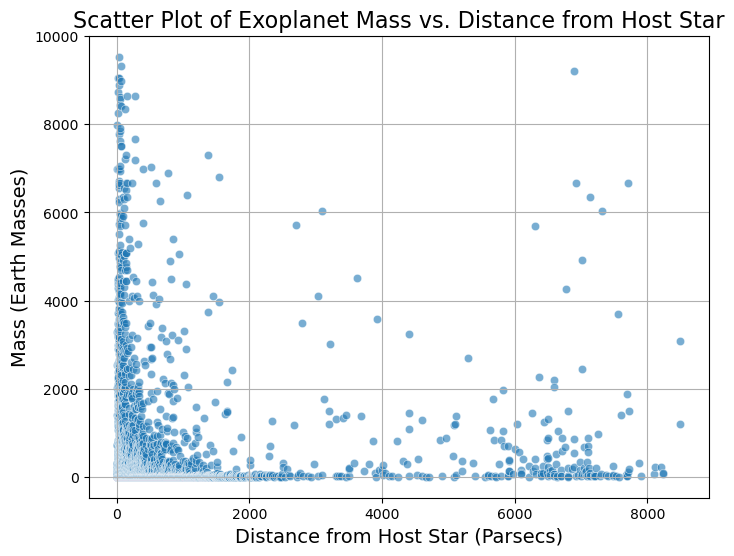

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import rdflib


# SPARQL query
query = """
PREFIX ex: <http://example.org/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?planetName ?mass ?distance
WHERE {
  ?planet ex:ExoplanetName ?planetName .
  ?planet ex:PlanetMassEarthMasses ?mass .
  ?planet ex:DistanceParsecs ?distance .

  FILTER(BOUND(?distance) && regex(str(?distance), "^[0-9.]+$"))
}
ORDER BY ASC(xsd:float(?distance))
"""

# Run the query and collect results
results = g.query(query)

# Function to safely convert values to float, returns None if invalid
def safe_float(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return None

# Store the results in a DataFrame with checks for invalid data
data = [(str(row.planetName), safe_float(row.mass), safe_float(row.distance)) for row in results]
# Filter out rows where Mass or Distance is None
data = [row for row in data if row[1] is not None and row[2] is not None]

# Convert the valid data into a DataFrame
df = pd.DataFrame(data, columns=["Planet", "Mass (Earth Masses)", "Distance (Parsecs)"])

# Strip any extra spaces from column names (if needed)
df.columns = df.columns.str.strip()

# Display the first few rows of the dataframe (to confirm data is correct)
print(df.head())

# Visualization: Scatter Plot of Mass vs. Distance
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Distance (Parsecs)", y="Mass (Earth Masses)", alpha=0.6)

# Customize the plot
plt.xlabel("Distance from Host Star (Parsecs)", fontsize=14)
plt.ylabel("Mass (Earth Masses)", fontsize=14)
plt.title("Scatter Plot of Exoplanet Mass vs. Distance from Host Star", fontsize=16)
plt.grid(True)

# Show the plot
plt.show()

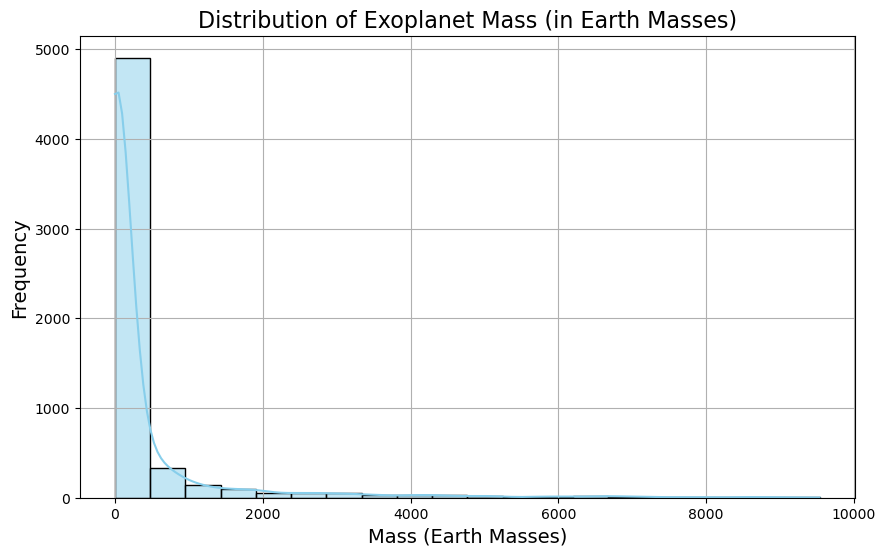

In [10]:
# Plotting the distribution of Mass (Earth Masses)
plt.figure(figsize=(10, 6))
sns.histplot(df['Mass (Earth Masses)'], kde=True, color="skyblue", bins=20)
plt.title("Distribution of Exoplanet Mass (in Earth Masses)", fontsize=16)
plt.xlabel("Mass (Earth Masses)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.show()


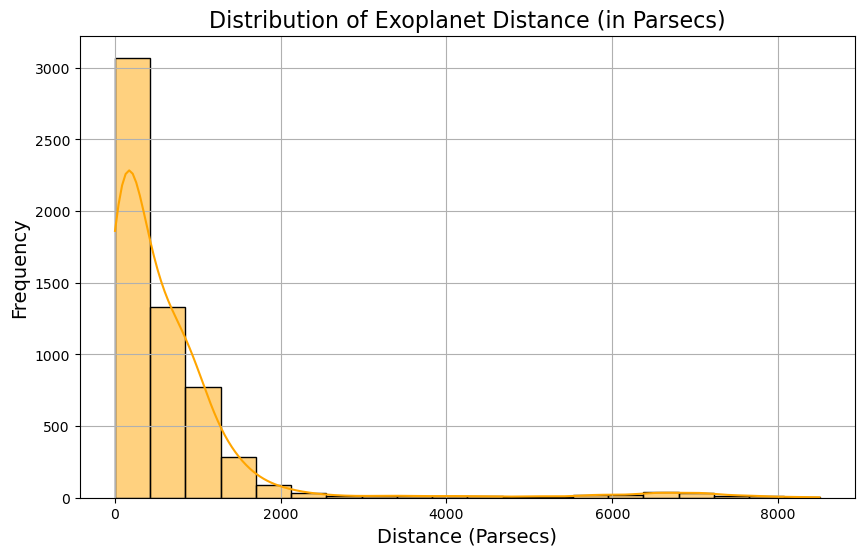

In [11]:
# Plotting the distribution of Distance (Parsecs)
plt.figure(figsize=(10, 6))
sns.histplot(df['Distance (Parsecs)'], kde=True, color="orange", bins=20)
plt.title("Distribution of Exoplanet Distance (in Parsecs)", fontsize=16)
plt.xlabel("Distance (Parsecs)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.show()


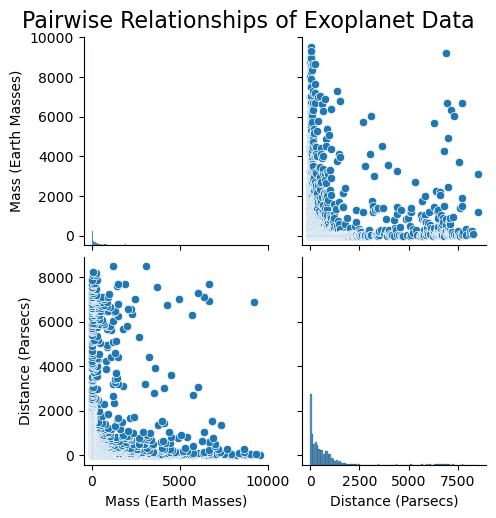

In [12]:
# Pairplot to visualize pairwise relationships between all numeric columns
sns.pairplot(df)
plt.suptitle("Pairwise Relationships of Exoplanet Data", fontsize=16, y=1.02)
plt.show()


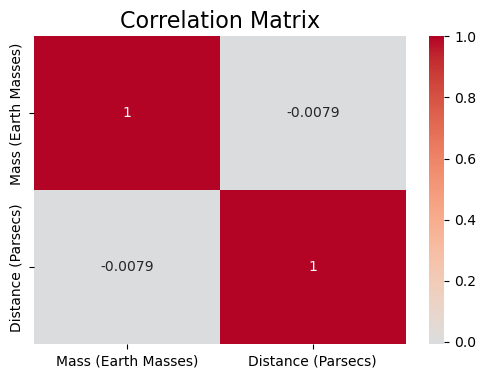

In [13]:
# Correlation matrix and heatmap
correlation = df[['Mass (Earth Masses)', 'Distance (Parsecs)']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix", fontsize=16)
plt.show()


In [64]:
query = """
PREFIX ex: <http://example.org/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?planetName ?starTemperature ?starMetallicity ?distance
WHERE {
  ?planet ex:ExoplanetName ?planetName .
  ?planet ex:StarTemperatureK ?starTemperature .
  ?planet ex:StarMetallicityFeH ?starMetallicity .
  ?planet ex:DistanceParsecs ?distance .
  FILTER(BOUND(?starTemperature) && regex(str(?starTemperature), "^[0-9.]+$"))
  FILTER(BOUND(?starMetallicity) && regex(str(?starMetallicity), "^[0-9.-]+$"))
  FILTER(BOUND(?distance) && regex(str(?distance), "^[0-9.]+$"))
}
ORDER BY ASC(xsd:float(?distance))
"""

# Run the query to get data
results = g.query(query)

# Function to safely convert values to float
def safe_float(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return None

# Store the results in a DataFrame
data = [(str(row.planetName), safe_float(row.starTemperature), safe_float(row.starMetallicity), safe_float(row.distance)) for row in results]
data = [row for row in data if row[1] is not None and row[2] is not None and row[3] is not None]

# Convert the valid data into a DataFrame
df = pd.DataFrame(data, columns=["ExoplanetName", "StarTemperatureK", "StarMetallicityFeH", "DistanceParsecs"])

# Strip any extra spaces from column names (if needed)
df.columns = df.columns.str.strip()

# Display the first few rows of the dataframe
print(df.head())



  ExoplanetName  StarTemperatureK  StarMetallicityFeH  DistanceParsecs
0     Barnard b           3195.00               -0.56          1.82655
1     Barnard c           3195.00               -0.56          1.82655
2     Barnard d           3195.00               -0.56          1.82655
3     Barnard e           3195.00               -0.56          1.82655
4     eps Eri b           5020.38               -0.13          3.20260


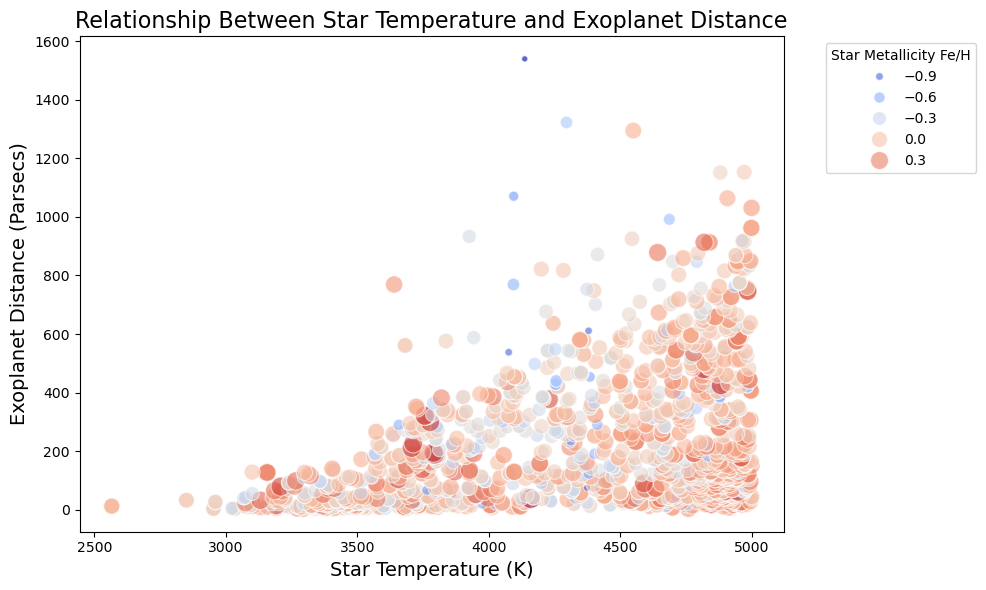

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for temperatures between 0 and 10000 K
df_filtered = df[(df["StarTemperatureK"] >= 0) & (df["StarTemperatureK"] <= 5000)]

# Visualization: Scatter Plot of Star Temperature vs. Distance with filtered data
plt.figure(figsize=(10, 6))

# Scatter plot of StarTemperatureK vs DistanceParsecs with color representing StarMetallicityFeH
sns.scatterplot(data=df_filtered, x="StarTemperatureK", y="DistanceParsecs", hue="StarMetallicityFeH", palette="coolwarm", size="StarMetallicityFeH", sizes=(20, 200), alpha=0.6)

# Customize the plot
plt.title("Relationship Between Star Temperature and Exoplanet Distance", fontsize=16)
plt.xlabel("Star Temperature (K)", fontsize=14)
plt.ylabel("Exoplanet Distance (Parsecs)", fontsize=14)
plt.legend(title="Star Metallicity Fe/H", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()
